In [1]:
import data_loaders as dl
import numpy as np
import LDS_tools as lt

import matplotlib.pyplot as plt


/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pynwb
from pynwb import NWBHDF5IO

In [3]:
file_name='Data/sub-monk-g_ses-session0 (1).nwb'

In [4]:
#dic = lt.fit_LDS( file_name, newRate=10, state_dim=8, emission='poisson', save_suffix = 'g_0', use_trials=np.arange(100))

In [5]:
all_files = ['Data/sub-monk-g_ses-session0 (1).nwb',
             'Data/sub-monk-g_ses-session2.nwb',
             'Data/sub-monk-g_ses-session3.nwb',
             'Data/sub-monk-g_ses-session4.nwb',
             'Data/sub-monk-g_ses-session5.nwb',
             'Data/sub-monk-g_ses-session6.nwb']
acqrates = [60,   60,    60,    60,   60,     60]
newrates = [10,   10,    10,    10,   10,     10]
suffix = ['g_0', 'g_2', 'g_3', 'g_4', 'g_5', 'g_6']

In [6]:
all_files = ['Data/sub-monk-j_ses-session0.nwb', 
             'Data/sub-monk-j_ses-session1.nwb',
             'Data/sub-monk-j_ses-session2.nwb',
             'Data/sub-monk-j_ses-session3.nwb']
suffix = ['j_0', 'j_1', 'j_2', 'j_3']
acqrates = [200,  200,   200,   200 ]
newqrates = [40,   40,    40,    40 ]

In [27]:
all_files = ['Data/sub-monk-g_ses-session0 (1).nwb',
             'Data/sub-monk-g_ses-session2.nwb',
             'Data/sub-monk-g_ses-session3.nwb',
             'Data/sub-monk-g_ses-session4.nwb',
             'Data/sub-monk-g_ses-session5.nwb',
             'Data/sub-monk-g_ses-session6.nwb',
             'Data/sub-monk-j_ses-session0.nwb', 
             'Data/sub-monk-j_ses-session1.nwb',
             'Data/sub-monk-j_ses-session2.nwb',
             'Data/sub-monk-j_ses-session3.nwb']
suffix = ['g_0', 'g_2', 'g_3', 'g_4', 'g_5', 'g_6', 'j_0', 'j_1', 'j_2', 'j_3']
acqrates = [60,   60,    60,    60,   60,     60,    200,  200,   200,   200 ]
newrates = [10,   10,    10,    10,   10,     10,     40,   40,    40,    40 ]

niters=3
state_dim=4
sd = '_sd4'

In [8]:
#dic = lt.fit_LDS( all_files[0], newRate=40, state_dim=8, emission='poisson', save_suffix = 'j_0', use_trials=np.arange(200))

In [9]:
use_trial = [0 for jj in range(len(all_files))]
for jj in range(len(all_files)):
    file_name=all_files[jj]
    with NWBHDF5IO( file_name , "r") as io:
        read_nwbfile = io.read()    
        obs = read_nwbfile.processing['behavior']['obstacle_position'].data
        
        ids=np.where(np.sum(np.abs(obs),axis=1)>0)
        trial_num = len(read_nwbfile.trials["id"].data)
        start_Index = np.int_(np.zeros(trial_num))
        
        for trial_id in range(trial_num):  
            start_time = read_nwbfile.trials["start_time"].data[trial_id]
            start_Index[trial_id] = round(start_time*acqrates[jj] - 1)
            
        sid = np.where(start_Index>ids[0][0])[0]-1
        if len(sid)>1:
            use_trial[jj] = sid[0]
        else:
            use_trial[jj] = trial_num

In [10]:
use_trial

[63, 63, 63, 63, 126, 62, 198, 15, 89, 79]

In [11]:
'''
A = dic['lds'].dynamics.A
evalue, evecs = np.linalg.eig( A- np.eye(A.shape[0]))
all_eval = []
ecomp = evalue[np.imag(evalue)>0]
emax = ecomp[np.real(ecomp)==max(np.real(ecomp))]
ereal = np.real(emax)
eimag = np.imag(emax)
all_eval.append(emax)
'''

"\nA = dic['lds'].dynamics.A\nevalue, evecs = np.linalg.eig( A- np.eye(A.shape[0]))\nall_eval = []\necomp = evalue[np.imag(evalue)>0]\nemax = ecomp[np.real(ecomp)==max(np.real(ecomp))]\nereal = np.real(emax)\neimag = np.imag(emax)\nall_eval.append(emax)\n"

In [28]:
all_eval_freq=[]     # frequency
all_eval_ts = []     # timescale
eval_ts = []    # timescale

#use_trials  = np.arange(100)
for jj in range(len(all_files)):
    for iters in range(niters):
        dic_new = lt.fit_LDS( all_files[jj], acqRate=acqrates[jj], newRate=newrates[jj], state_dim=state_dim, emission='poisson', save_suffix = suffix[jj], use_trials=np.arange(use_trial[jj]))
        A = dic_new['lds'].dynamics.A
        evalue, evecs = np.linalg.eig( A- np.eye(A.shape[0]))
        ecomp = evalue[np.imag(evalue)>0]
        ereal = evalue[np.imag(evalue)>=0]
        for ee in ereal:
            eval_ts.append( -(1/newrates[jj])/np.log(1+np.real(ee)) )
        if len(ecomp)>0:
            emax = ecomp[np.real(ecomp)==max(np.real(ecomp))]
            all_eval_freq.append( np.imag(emax)/(1/newrates[jj]) )
            all_eval_ts.append( -(1/newrates[jj])/np.log(1+np.real(emax)) )



/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -147095.6: 100%|██████████| 20/20 [00:35<00:00,  1.77s/it]
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -147157.0: 100%|██████████| 20/20 [00:39<00:00,  1.97s/it]
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -147181.9: 100%|██████████| 20/20 [00:43<00:00,  2.17s/it]
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -188726.8: 100%|██████████| 20/20 [00:50<00:00,  2.54s/it]
/var/folders/sb/xhp3vl193vxd7sv2_2mykkq80000gn/T/ipykernel_70548/2829854706.py:14: RuntimeWarning: invalid value encountered in log
  eval_ts.append( -(1/newrates[jj])/np.log(1+np.real(ee)) )
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -188540.0: 100%|██████████| 20/20 [00:48<00:00,  2.43s/it]
/var/folders/sb/xhp3vl193vxd7sv2_2mykkq80000gn/T/ipykernel_70548/2829854706.py:14: RuntimeWarning: invalid value encountered in log
  eval_ts.append( -(1/newrates[jj])/np.log(1+np.real(ee)) )
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -188756.5: 100%|██████████| 20/20 [00:45<00:00,  2.25s/it]
/var/folders/sb/xhp3vl193vxd7sv2_2mykkq80000gn/T/ipykernel_70548/2829854706.py:14: RuntimeWarning: invalid value encountered in log
  eval_ts.append( -(1/newrates[jj])/np.log(1+np.real(ee)) )
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -105958.6: 100%|██████████| 20/20 [00:38<00:00,  1.92s/it]
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -106097.4: 100%|██████████| 20/20 [00:37<00:00,  1.87s/it]
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -106091.2: 100%|██████████| 20/20 [00:35<00:00,  1.79s/it]
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -245412.4: 100%|██████████| 20/20 [00:54<00:00,  2.74s/it]
/var/folders/sb/xhp3vl193vxd7sv2_2mykkq80000gn/T/ipykernel_70548/2829854706.py:14: RuntimeWarning: invalid value encountered in log
  eval_ts.append( -(1/newrates[jj])/np.log(1+np.real(ee)) )
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -245378.1: 100%|██████████| 20/20 [00:44<00:00,  2.23s/it]
/var/folders/sb/xhp3vl193vxd7sv2_2mykkq80000gn/T/ipykernel_70548/2829854706.py:14: RuntimeWarning: invalid value encountered in log
  eval_ts.append( -(1/newrates[jj])/np.log(1+np.real(ee)) )
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -245303.2: 100%|██████████| 20/20 [00:44<00:00,  2.24s/it]
/var/folders/sb/xhp3vl193vxd7sv2_2mykkq80000gn/T/ipykernel_70548/2829854706.py:14: RuntimeWarning: invalid value encountered in log
  eval_ts.append( -(1/newrates[jj])/np.log(1+np.real(ee)) )
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -257682.0: 100%|██████████| 20/20 [00:51<00:00,  2.59s/it]
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -258025.4: 100%|██████████| 20/20 [00:49<00:00,  2.49s/it]
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -257685.2: 100%|██████████| 20/20 [00:50<00:00,  2.54s/it]
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -138917.2: 100%|██████████| 20/20 [00:38<00:00,  1.91s/it]
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -139013.7: 100%|██████████| 20/20 [00:36<00:00,  1.84s/it]
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -139046.0: 100%|██████████| 20/20 [00:38<00:00,  1.92s/it]
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -212599.9: 100%|██████████| 20/20 [02:05<00:00,  6.28s/it]
/var/folders/sb/xhp3vl193vxd7sv2_2mykkq80000gn/T/ipykernel_70548/2829854706.py:14: RuntimeWarning: invalid value encountered in log
  eval_ts.append( -(1/newrates[jj])/np.log(1+np.real(ee)) )
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -212618.5: 100%|██████████| 20/20 [02:33<00:00,  7.69s/it]
/var/folders/sb/xhp3vl193vxd7sv2_2mykkq80000gn/T/ipykernel_70548/2829854706.py:14: RuntimeWarning: invalid value encountered in log
  eval_ts.append( -(1/newrates[jj])/np.log(1+np.real(ee)) )
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -211761.0: 100%|██████████| 20/20 [01:59<00:00,  5.95s/it]
/var/folders/sb/xhp3vl193vxd7sv2_2mykkq80000gn/T/ipykernel_70548/2829854706.py:14: RuntimeWarning: invalid value encountered in log
  eval_ts.append( -(1/newrates[jj])/np.log(1+np.real(ee)) )
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -32221.1: 100%|██████████| 20/20 [00:31<00:00,  1.59s/it]
/var/folders/sb/xhp3vl193vxd7sv2_2mykkq80000gn/T/ipykernel_70548/2829854706.py:14: RuntimeWarning: invalid value encountered in log
  eval_ts.append( -(1/newrates[jj])/np.log(1+np.real(ee)) )
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -32410.8: 100%|██████████| 20/20 [00:31<00:00,  1.59s/it]
/var/folders/sb/xhp3vl193vxd7sv2_2mykkq80000gn/T/ipykernel_70548/2829854706.py:14: RuntimeWarning: invalid value encountered in log
  eval_ts.append( -(1/newrates[jj])/np.log(1+np.real(ee)) )
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -32361.3: 100%|██████████| 20/20 [00:30<00:00,  1.54s/it]
/var/folders/sb/xhp3vl193vxd7sv2_2mykkq80000gn/T/ipykernel_70548/2829854706.py:14: RuntimeWarning: invalid value encountered in log
  eval_ts.append( -(1/newrates[jj])/np.log(1+np.real(ee)) )
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -104995.0: 100%|██████████| 20/20 [01:12<00:00,  3.65s/it]
/var/folders/sb/xhp3vl193vxd7sv2_2mykkq80000gn/T/ipykernel_70548/2829854706.py:14: RuntimeWarning: invalid value encountered in log
  eval_ts.append( -(1/newrates[jj])/np.log(1+np.real(ee)) )
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -104643.4: 100%|██████████| 20/20 [01:12<00:00,  3.61s/it]
/var/folders/sb/xhp3vl193vxd7sv2_2mykkq80000gn/T/ipykernel_70548/2829854706.py:14: RuntimeWarning: invalid value encountered in log
  eval_ts.append( -(1/newrates[jj])/np.log(1+np.real(ee)) )
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -104771.0: 100%|██████████| 20/20 [01:11<00:00,  3.58s/it]
/var/folders/sb/xhp3vl193vxd7sv2_2mykkq80000gn/T/ipykernel_70548/2829854706.py:14: RuntimeWarning: invalid value encountered in log
  eval_ts.append( -(1/newrates[jj])/np.log(1+np.real(ee)) )
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -72997.5: 100%|██████████| 20/20 [01:16<00:00,  3.81s/it]
/var/folders/sb/xhp3vl193vxd7sv2_2mykkq80000gn/T/ipykernel_70548/2829854706.py:14: RuntimeWarning: invalid value encountered in log
  eval_ts.append( -(1/newrates[jj])/np.log(1+np.real(ee)) )
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -73123.2: 100%|██████████| 20/20 [01:15<00:00,  3.78s/it]
/var/folders/sb/xhp3vl193vxd7sv2_2mykkq80000gn/T/ipykernel_70548/2829854706.py:14: RuntimeWarning: invalid value encountered in log
  eval_ts.append( -(1/newrates[jj])/np.log(1+np.real(ee)) )
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -72663.9: 100%|██████████| 20/20 [01:15<00:00,  3.77s/it]
/var/folders/sb/xhp3vl193vxd7sv2_2mykkq80000gn/T/ipykernel_70548/2829854706.py:14: RuntimeWarning: invalid value encountered in log
  eval_ts.append( -(1/newrates[jj])/np.log(1+np.real(ee)) )


In [13]:
all_eval_freq

[array([0.75327961]),
 array([0.89647127]),
 array([1.10708006]),
 array([1.04812319]),
 array([1.73819822]),
 array([0.89007352]),
 array([1.18849549]),
 array([0.23381822])]

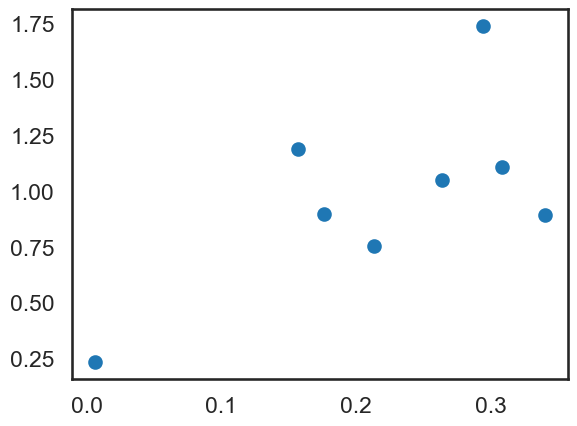

In [14]:
plt.scatter( all_eval_ts, all_eval_freq)

In [15]:
res  = {'all_files': all_files, 'suffix':suffix, 'all_eval':all_eval }
np.save( 'results_state_dim_8.npy', res)

NameError: name 'all_eval' is not defined

In [16]:
mod_res = np.load( 'relu_iters_lds12_concat.npy', allow_pickle=True).item()

In [17]:
mod_res.keys()

dict_keys(['files', 'cev', 'ev', 'lc', 'loss_final', 'nz', 'train_frac', 'maxe1a', 'maxe2a', 'maxe1b', 'maxe2b'])

In [18]:
len(mod_res['ev'])

140

In [19]:
all_ev_mod = []
for jj in range(len(mod_res['ev'])):
    if mod_res['cev'][jj]>0.9:
        evalue = mod_res['ev'][jj]
        ecomp = evalue[np.imag(evalue)>0]
        emax = ecomp[np.real(ecomp)==max(np.real(ecomp))]
        ereal = np.real(emax)
        eimag = np.imag(emax)
        all_ev_mod.append(emax)

In [20]:
all_ev_mod

[array([-0.10297059+0.10579203j], dtype=complex64),
 array([-0.10142027+0.10867319j], dtype=complex64),
 array([-0.09745478+0.12088273j], dtype=complex64),
 array([-0.10197628+0.12368593j], dtype=complex64),
 array([-0.09935859+0.12049925j], dtype=complex64),
 array([-0.11696399+0.09200595j], dtype=complex64),
 array([-0.09803654+0.12547228j], dtype=complex64),
 array([-0.10482359+0.10788853j], dtype=complex64),
 array([-0.10085036+0.10794017j], dtype=complex64),
 array([-0.0982223+0.11465585j], dtype=complex64),
 array([-0.12415276+0.08154369j], dtype=complex64),
 array([-0.10453078+0.10926137j], dtype=complex64),
 array([-0.11783145+0.09551144j], dtype=complex64),
 array([-0.11214933+0.10751038j], dtype=complex64),
 array([-0.14636984+0.05783819j], dtype=complex64),
 array([-0.09731746+0.10976711j], dtype=complex64),
 array([-0.11137059+0.10532811j], dtype=complex64),
 array([-0.11252123+0.09394027j], dtype=complex64),
 array([-0.11581357+0.10803486j], dtype=complex64),
 array([-0.10

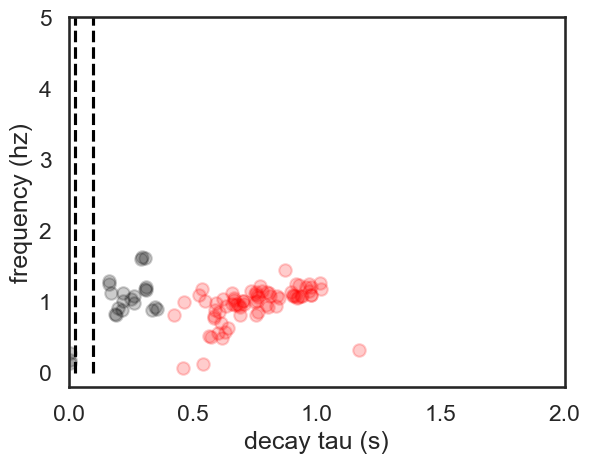

In [29]:
plt.figure
plt.plot([0.1,0.1],[0,5],'k--')
plt.plot([1/40,1/40],[0,5],'k--')
plt.scatter(-0.1/np.log(1+np.real(all_ev_mod)), np.imag(all_ev_mod)/0.1,color='r',alpha=0.2, label='model')
#plt.scatter(-0.1/np.log(1+np.real(all_eval)), np.imag(all_eval)/(1/40),color='k', label='data')
plt.scatter( all_eval_ts, all_eval_freq, color='k',alpha=0.2, label='data')
plt.xlim([0,2])
plt.ylim([-.2,5])
plt.xlabel('decay tau (s)')
plt.ylabel('frequency (hz)')
plt.savefig('all_eval.png')
plt.savefig('all_eval.svg')


In [22]:
all_eval_freq_noinp=[]     # frequency
all_eval_ts_noinp = []     # timescale
eval_ts_noinp = []    # timescale

#use_trials  = np.arange(100)
for jj in range(len(all_files)):
    dic_new = lt.fit_LDS( all_files[jj], acqRate=acqrates[jj], newRate=newrates[jj], state_dim=state_dim, emission='poisson',
                          save_suffix = suffix[jj]+'_noinp', use_trials=np.arange(use_trial[jj]),
                          use_inp=False)
    A = dic_new['lds'].dynamics.A
    evalue, evecs = np.linalg.eig( A- np.eye(A.shape[0]))
    ecomp = evalue[np.imag(evalue)>0]
    ereal = evalue[np.imag(evalue)>=0]
    for ee in ereal:
        eval_ts_noinp.append( -(1/newrates[jj])/np.log(1+np.real(ee)) )
    if len(ecomp)>0:
        emax = ecomp[np.real(ecomp)==max(np.real(ecomp))]
        all_eval_freq_noinp.append( np.imag(emax)/(1/newrates[jj]) )
        all_eval_ts_noinp.append( -(1/newrates[jj])/np.log(1+np.real(emax)) )


/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -147337.5: 100%|██████████| 20/20 [00:40<00:00,  2.01s/it]
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -189073.3: 100%|██████████| 20/20 [00:44<00:00,  2.25s/it]
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -106287.5: 100%|██████████| 20/20 [00:34<00:00,  1.74s/it]
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -245714.3: 100%|██████████| 20/20 [00:43<00:00,  2.19s/it]
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -257168.6: 100%|██████████| 20/20 [00:52<00:00,  2.63s/it]
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -139107.8: 100%|██████████| 20/20 [00:37<00:00,  1.88s/it]
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -213140.0: 100%|██████████| 20/20 [01:39<00:00,  4.95s/it]
/var/folders/sb/xhp3vl193vxd7sv2_2mykkq80000gn/T/ipykernel_70548/2921671694.py:15: RuntimeWarning: invalid value encountered in log
  eval_ts_noinp.append( -(1/newrates[jj])/np.log(1+np.real(ee)) )
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -32640.5: 100%|██████████| 20/20 [00:33<00:00,  1.68s/it]
/var/folders/sb/xhp3vl193vxd7sv2_2mykkq80000gn/T/ipykernel_70548/2921671694.py:15: RuntimeWarning: invalid value encountered in log
  eval_ts_noinp.append( -(1/newrates[jj])/np.log(1+np.real(ee)) )
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -105018.8: 100%|██████████| 20/20 [01:07<00:00,  3.38s/it]
/var/folders/sb/xhp3vl193vxd7sv2_2mykkq80000gn/T/ipykernel_70548/2921671694.py:15: RuntimeWarning: invalid value encountered in log
  eval_ts_noinp.append( -(1/newrates[jj])/np.log(1+np.real(ee)) )
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -73382.7: 100%|██████████| 20/20 [01:09<00:00,  3.46s/it]
/var/folders/sb/xhp3vl193vxd7sv2_2mykkq80000gn/T/ipykernel_70548/2921671694.py:15: RuntimeWarning: invalid value encountered in log
  eval_ts_noinp.append( -(1/newrates[jj])/np.log(1+np.real(ee)) )


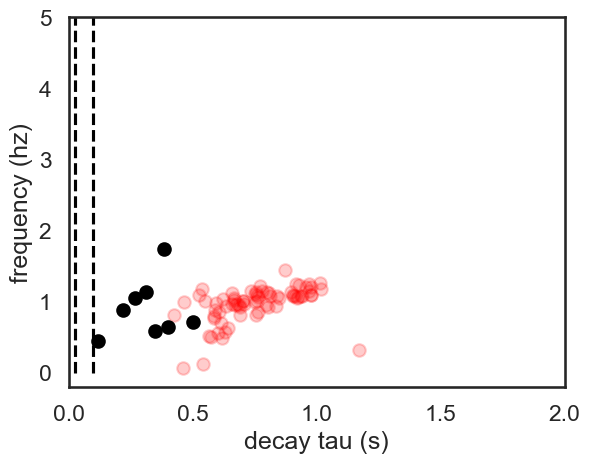

In [23]:
plt.figure
plt.plot([0.1,0.1],[0,5],'k--')
plt.plot([1/40,1/40],[0,5],'k--')
plt.scatter(-0.1/np.log(1+np.real(all_ev_mod)), np.imag(all_ev_mod)/0.1,color='r',alpha=0.2, label='model')
plt.scatter( all_eval_ts_noinp, all_eval_freq_noinp, color='k', label='data')
plt.xlim([0,2])
plt.ylim([-.2,5])
plt.xlabel('decay tau (s)')
plt.ylabel('frequency (hz)')
plt.savefig('all_eval_noinp.png')
plt.savefig('all_eval_noinp.svg')

In [24]:
dic_new['lds'].dynamics.Vs

array([], shape=(1, 8, 0), dtype=float64)

In [25]:
all_eval_freq_nofb=[]     # frequency
all_eval_ts_nofb = []     # timescale
eval_ts_nofb = []    # timescale

#use_trials  = np.arange(100)
for jj in range(len(all_files)):
    dic_new = lt.fit_LDS( all_files[jj], acqRate=acqrates[jj], newRate=newrates[jj], state_dim=state_dim, emission='poisson',
                          save_suffix = suffix[jj]+'_nofb', use_trials=np.arange(use_trial[jj]),
                          use_fb=False)
    A = dic_new['lds'].dynamics.A
    evalue, evecs = np.linalg.eig( A- np.eye(A.shape[0]))
    ecomp = evalue[np.imag(evalue)>0]
    ereal = evalue[np.imag(evalue)>=0]
    for ee in ereal:
        eval_ts_nofb.append( -(1/newrates[jj])/np.log(1+np.real(ee)) )
    if len(ecomp)>0:
        emax = ecomp[np.real(ecomp)==max(np.real(ecomp))]
        all_eval_freq_nofb.append( np.imag(emax)/(1/newrates[jj]) )
        all_eval_ts_nofb.append( -(1/newrates[jj])/np.log(1+np.real(emax)) )


/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -147205.5: 100%|██████████| 20/20 [00:33<00:00,  1.66s/it]
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -188928.7: 100%|██████████| 20/20 [00:43<00:00,  2.15s/it]
/var/folders/sb/xhp3vl193vxd7sv2_2mykkq80000gn/T/ipykernel_70548/3908295789.py:15: RuntimeWarning: invalid value encountered in log
  eval_ts_nofb.append( -(1/newrates[jj])/np.log(1+np.real(ee)) )
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -106371.0: 100%|██████████| 20/20 [00:31<00:00,  1.60s/it]
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -245497.4: 100%|██████████| 20/20 [00:45<00:00,  2.26s/it]
/var/folders/sb/xhp3vl193vxd7sv2_2mykkq80000gn/T/ipykernel_70548/3908295789.py:15: RuntimeWarning: invalid value encountered in log
  eval_ts_nofb.append( -(1/newrates[jj])/np.log(1+np.real(ee)) )
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -257764.7: 100%|██████████| 20/20 [00:55<00:00,  2.76s/it]
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -138955.8: 100%|██████████| 20/20 [00:40<00:00,  2.04s/it]
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -212959.1: 100%|██████████| 20/20 [01:43<00:00,  5.19s/it]
/var/folders/sb/xhp3vl193vxd7sv2_2mykkq80000gn/T/ipykernel_70548/3908295789.py:15: RuntimeWarning: invalid value encountered in log
  eval_ts_nofb.append( -(1/newrates[jj])/np.log(1+np.real(ee)) )
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -32402.5: 100%|██████████| 20/20 [00:34<00:00,  1.72s/it]
/var/folders/sb/xhp3vl193vxd7sv2_2mykkq80000gn/T/ipykernel_70548/3908295789.py:15: RuntimeWarning: invalid value encountered in log
  eval_ts_nofb.append( -(1/newrates[jj])/np.log(1+np.real(ee)) )
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -104583.4: 100%|██████████| 20/20 [01:10<00:00,  3.51s/it]
/var/folders/sb/xhp3vl193vxd7sv2_2mykkq80000gn/T/ipykernel_70548/3908295789.py:15: RuntimeWarning: invalid value encountered in log
  eval_ts_nofb.append( -(1/newrates[jj])/np.log(1+np.real(ee)) )
/Users/harshagurnani/Documents/GitHub/ssm/ssm_fit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
ARHMM Initialization restarts:   0%|          | 0/1 [00:00<?, ?it/s]

Initializing with an ARHMM using 25 steps of EM.


ELBO: -73814.8: 100%|██████████| 20/20 [01:11<00:00,  3.60s/it]
/var/folders/sb/xhp3vl193vxd7sv2_2mykkq80000gn/T/ipykernel_70548/3908295789.py:15: RuntimeWarning: invalid value encountered in log
  eval_ts_nofb.append( -(1/newrates[jj])/np.log(1+np.real(ee)) )


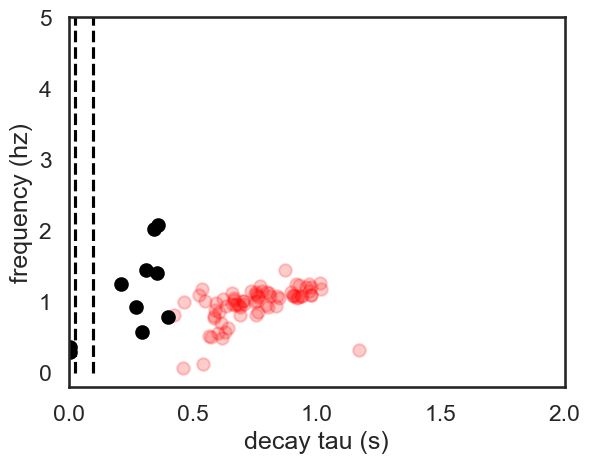

In [26]:
plt.figure
plt.plot([0.1,0.1],[0,5],'k--')
plt.plot([1/40,1/40],[0,5],'k--')
plt.scatter(-0.1/np.log(1+np.real(all_ev_mod)), np.imag(all_ev_mod)/0.1,color='r',alpha=0.2, label='model')
plt.scatter( all_eval_ts_nofb, all_eval_freq_nofb, color='k', label='data')
plt.xlim([0,2])
plt.ylim([-.2,5])
plt.xlabel('decay tau (s)')
plt.ylabel('frequency (hz)')
plt.savefig('all_eval_nofb.png')
plt.savefig('all_eval_nofb.svg')